# Part 1:

1. x is an array of 2 dimensions while y is a one dimensional array. Both arrays need to be have same dimensions for arithmetic operations.
Therefore, we add a new axis to array 'y' to increase its dimension to 2. Option **e** is the correct answer.

2. a. x, y = np.mgrid[:10, :5] results in x and y having size of (10, 5). The sum of x and y also results in the same sized array.

   b. x, y = np.ogrid[:10, :5] results in x and y having sizes of (1, 10) and (5, 1) respectively. However, the sum of x and y produces a (10, 5) array.

3. In the previous question, regardless of how we intialized x, y the result of their summation is same. But the initial size of x and y created using ogrid is smaller than mgrid. When x and y created using the former are called for summation, they are broadcasted w.r.t eachother. However, the instances of mgrid are already broadcasted and require more memory for storage.

#### question 4

[[   0.  198.  303.  736.  871. 1175. 1475. 1544. 1913. 2448.]
 [ 198.    0.  105.  538.  673.  977. 1277. 1346. 1715. 2250.]
 [ 303.  105.    0.  433.  568.  872. 1172. 1241. 1610. 2145.]
 [ 736.  538.  433.    0.  135.  439.  739.  808. 1177. 1712.]
 [ 871.  673.  568.  135.    0.  304.  604.  673. 1042. 1577.]
 [1175.  977.  872.  439.  304.    0.  300.  369.  738. 1273.]
 [1475. 1277. 1172.  739.  604.  300.    0.   69.  438.  973.]
 [1544. 1346. 1241.  808.  673.  369.   69.    0.  369.  904.]
 [1913. 1715. 1610. 1177. 1042.  738.  438.  369.    0.  535.]
 [2448. 2250. 2145. 1712. 1577. 1273.  973.  904.  535.    0.]]


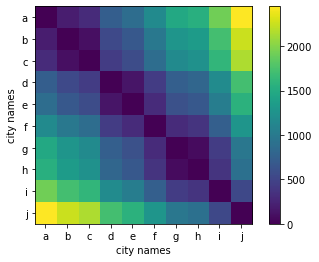

In [1]:
import numpy as np
import string
import matplotlib.pyplot as plt

distances = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
colorbarmap = np.zeros((len(distances), len(distances)))
ab = string.ascii_lowercase
citynames = [ab[i] for i in range(0, len(distances))]
    
for i in range(0, len(distances)):
    for j in range(0, len(distances)):
        colorbarmap[i, j] = abs(distances[i] - distances[j])
        
print(colorbarmap)
fig, ax1 = plt.subplots()
ax1.set_xlabel("city names")
ax1.set_ylabel("city names")

num = np.arange(len(distances))
ax1.set_xticks(num, citynames)
ax1.set_yticks(num, citynames)

im = ax1.imshow(colorbarmap)

plt.colorbar(im)
plt.show()

#### question 5

In [2]:
import copy as cp

T = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

Q = cp.deepcopy(T)
T[1][1] = 200000

print(T, Q)

#Assignment of variables in python do not copy objects, they create bindings between a target and an object. 
#So modifying the source object reflects in assigned variable. The deepcopy fucntion creates a new objects and copies the source objects.

[[1, 2, 3], [4, 200000, 6], [7, 8, 9]] [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


#### question 6

In [3]:
import numpy as np

X = np.array([5, 9, 77, 0, 74, 55, 81, 79, 90])
Y = np.array([5, 1, 46, 2, 10, 29, 55, 4, 90])

Z = np.where(X>Y)

A = np.where(X==Y)

print(Z)
print(A)

(array([1, 2, 4, 5, 6, 7]),)
(array([0, 8]),)


## Part 2: 
## 1. Tensor Manipulations

In [4]:
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
MNIST = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=None)
im_shape = np.array(MNIST[0][0]).shape
im_size = np.size(np.array(MNIST[0][0]))

#### a) Visualize the first 5 numbers

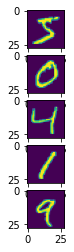

In [6]:
fig, ax = plt.subplots(5)
display_imgs = [ax[i].imshow(MNIST[i][0]) for i in range(5)]

#### b) Flip and Transpose

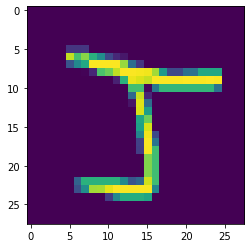

In [7]:
plt.imshow(np.flip(np.array(MNIST[2][0]).T, 0))

#### c) Create a batch of MNIST digits and flatten it to a single vector

In [8]:
batch_size = 10
images = np.array([np.array(MNIST[i][0]) for i in range(batch_size)]).flatten()

#### d) Visualize  all  numbers  in the batch  vertically  by  collapsing  the  batch dimension with the other appropriate dimension. 

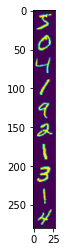

In [9]:
def vertical_plot(flat_arr):    
    return plt.imshow(np.reshape(flat_arr, (-1, im_shape[1])))

vertical_plot(images)

#### e) Now visualize all numbers in the batch horizontally

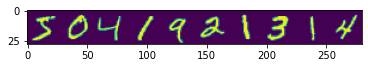

In [10]:
plt.imshow(np.hstack(np.split(np.reshape(images, (-1, im_shape[1])), batch_size, axis=0)))

#### f) Split the batch dimension into two new batches and plot horizontally.

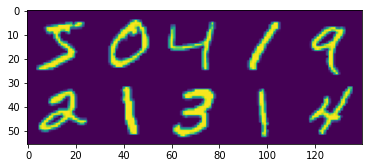

In [11]:
plt.imshow(np.vstack(np.split(np.hstack(np.split(np.reshape(images, (-1, im_shape[1])), batch_size, axis=0)), 2, axis=1)))

## 2. More Tensor Manipulations and Plotting

#### a) Normalize the batch of data to only contain values between [0,1]

In [12]:
images_norm = images/np.linalg.norm(images)

#### b) Find the mean of each sample in the batch.

In [13]:
images_mean = [np.mean(images[i*im_size:(i+1)*im_size]) for i in range(batch_size)]

#### c) Plot the means in a histogram using the matplotlib library.

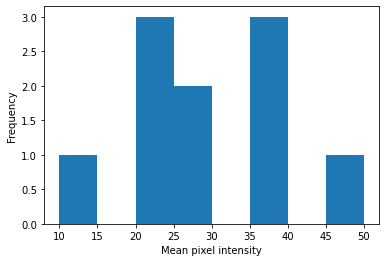

In [14]:
def plotHist(vector, hBin, xlabel):
    fig, ax = plt.subplots(1)
    ax.hist(vector, bins=hBin)
    ax.set_ylabel('Frequency')
    ax.set_xlabel(xlabel)
    plt.show()
plotHist(images_mean, [10, 15, 20, 25, 30, 35, 40, 45, 50], 'Mean pixel intensity')

#### d) Create a 3D plot of a single MNIST digit using matplotlib.

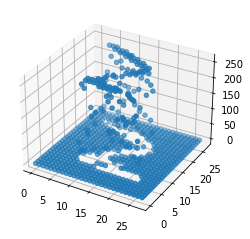

In [15]:
from mpl_toolkits.mplot3d import Axes3D

xv, yv = np.meshgrid(range(im_shape[0]), range(im_shape[1]))
image = np.array(MNIST[0][0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xv, yv, image)

#### e) Order each sample in your MNIST dataset by digit.

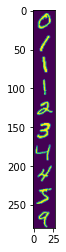

In [16]:
labels = MNIST.targets[0:batch_size].numpy()
ordered_images = np.array(np.split(images, batch_size, axis=0))[np.argsort(labels)].flatten()
vertical_plot(ordered_images)

#### f) Use the matplotlib  subplot function to recreate the above histogram, but for each individual digit.

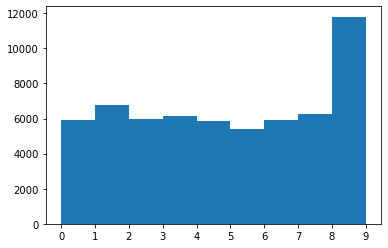

In [17]:
labels = MNIST.targets
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, ax = plt.subplots(1)
ax.hist(labels, bins)
ax.set_xticks(bins)
plt.show()

## Part 3:

#### 1. Give 4 examples where only one of these data structures are useful and no other data structure would be efficient. (i) Lists (ii) Sets (ii) Tuples (iv) Dicts 
i) Lists are python's inbuilt array-like data structure. Lists can contain any data type. They are useful for storing and indexing unstructured multiple-type data.

ii) Sets are non-iterable, immutable and unordered. Sets also do not support duplicate elements. They are useful for storing unique datastructures and can be used for verifying the membership. Sets are very close to mathematical definition of sets and therefore support general set operations such as union, intersection, difference etc.

iii) Tuples are similar to list except that they are immutable. Therefore tuples are memory efficient and generally faster to index when compared to lists. If we want immutable lists with a slightly better performance, we should consider using tuples.

iv) A dictionary is a collection of key-value pairs. They are useful when you want to associate a value (object) with a key. Accessing the value of a key is faster in dictionaries compared to list indexing.

#### 2. Write 5 python codes to demonstrate each of the 5 principles in SOLID principles. 

In [30]:
#Single Responsibility Principle
##bad design
class user:
    def getName(self, name):
        self.name = name
    def getAge(self, age):
        self.age = age
    def saveData(self, name):
        pass
###Individual classes should have single responsibility. For example, class user should only be concerned about user attributes and not about database management.
###Therefore, a good design according to SRP would be to implement database management as a seperate class.
##good design
class user:
    def getName(self, name):
        self.name = name
    def getAge(self, age):
        self.age = age

class userDB(user):
    def saveData(self, name):
        pass

    
#Open-Closed Principle
##bad design
class Animal:
    def __init__(self, name):
        self.name = name

def animalSounds(animals):
    for animal in animals:
        if animal.name=='Lion':
            print('Roar')
        if animal.name=='Cat':
            print('Purr')

##good design
###Interfaces should be extensible rather than being modified. In the above bad design example, animalSounds function has to modified everytime a new animal class is introduced.
###A good design would have animalSounds as an attribute of super-class Animals, so that it can be extended when a new class of animal is introduced.
class Animal:
    def __init__(self, name):
        self.name = name
    def makeSound(self):
        pass

class Lion(Animal):
    def makeSound(self):
        print("Roar")

class Cat(Animal):
    def makeSound(self):
        print("Purr")


#Liskov Substitution Principle
##bad design
class Animal:
    def __init__(self, name):
        self.name = name

def animalSounds(animals):
    for animal in animals:
        if animal.name=='Lion':
            print('Roar')
        if animal.name=='Cat':
            print('Purr')
###A sub-class must be substitutable for its super-class, i.e. a sub-class/function should be able to call the method without checking for the type.
###A good implementation of LSP has subclasses which can implement the super-class methods without any errors.
##good design
class Animal:
    def __init__(self, name):
        self.name = name
    def makeSound(self):
        pass

class Lion(Animal):
    def makeSound(self):
        print("Roar")

class Cat(Animal):
    def makeSound(self):
        print("Purr")

def animalSounds(animals):
    for animal in animals:
        animal.makeSound()

#Interface Segregation Principle
##bad design
class Animal:
    def eats_grass(self):
        pass
    def eats_grain(self):
        pass
    def eats_meat(self):
        pass
###ISP states that instance specific attributes should be left to sub-classes.
##good design
class Animal:
    def eats(self):
        pass

class Lion(Animal):
    def eats(self):
        pass

class Deer(Animal):
    def eats(self):
        pass

class Pigeon(Animal):
    def eats(self):
        pass

#Dependency Inversion Principle
##bad design
class feedGrass:
    def feed(self):
        pass

class Deer:
    def eats(self):
        food = feedGrass()
        food.feed()

deer1 = Deer()
deer1.eats()
###Dependency should be on abstractions not concretions
###A. High-level modules should not depend upon low-level modules. Both should depend upon abstractions.
###B. Abstractions should not depend on details. Details should depend upon abstractions.
###Deer class instantiates the feedGrass class and used the feed method. 
###In future, if the deer doesn't want to eat grass anymore, they will starve because the system is hardwired to feed grass.
###A design complying with DIP includes an abstraction layer to keep system stable by making both feedGrass and Deer dependent on it. Such that if deer 
##good design
class feed:
    def feed(self):
        pass

class feedGrass(feed):
    def feed(self):
        pass

class feedGrain(feed):
    def feed(self):
        pass

class Deer:
    def eats(self, food_type: feed):
        food = food_type
        food.feed()

deer1 = Deer()
deer1.eats(feedGrain)

Roar
Purr


#### 3. Write a program which can read from both command line arguments and a yaml file. i.e. you will have  the  default configuration  for the parameters provided in  a yaml  file  and  you  can  override  them  using  command  line  arguments  and  every time you run the  code, it  should create a run folder (automatically incrementing the version number of the run) and store the parameters used for the run in that folder. 

In [19]:
import yaml
import os, sys

with open('hm2.yaml') as f:
    config = yaml.safe_load(f)

def sum(array, scalar):
    return np.array(array) + scalar

def callsum():
    print(config)
    x = input("Override 'num' in config? [y/n]")
    scalar = float(input("Provide a new num: ")) if x=='y' else config["num"]
    print(sum(config["array1"], scalar))

callsum()
    
foldername = 'run' + f'-{config["version"]}'
os.mkdir(foldername)
path = f'/Users/ajithmoola/dlml/DLRG_assignments/{foldername}/run.yaml'
increaseRefCountth open('hm2.yaml', 'w') as f:
    config["version"] = int(config["version"]) + 1
    yaml.dump(config, f)
    with open(path, 'w') as f1:
        yaml.dump(config, f1)

{'array1': [1, 2, 3, 4, 5, 6], 'num': 10, 'version': 3}


Override 'num' in config? [y/n] n


[11 12 13 14 15 16]


#### 4. Write a program that can manually increase the reference count of variables and then  manually  call  the  garbage  collection  to  happen.  For  this,  you  will  have  to create a Class and instantiate it. 

In [27]:
import sys
import gc

class myObject:
    def __init__(self, data):
        self.var = data
        self.refCount = 1
    
    def increaseRefCount(self):
        self.refCount += 1
    
    def decreaseRefCount(self):
        self.refCount += -1
    
    def collectGarbage(self):
        if self.refCount!=0:
            x = input("Warning: There are existing references to this object. Override? y/n")
            if x=='y':
                print("Collecting garbage...")
                gc.collect
                print("Object deleted")
            else:
                print("Exiting garbage collection program")
                      
x = myObject(2)
y = x
x.increaseRefCount()
x.collectGarbage()

Exiting garbage collection program


#### 5. Write a program to take a command line input of a given image name (can be any format,  bmp,  jpg,  jpeg,  png,  tiff  etc.)  and  convert  that  image  into  a  JPG  format image with resolution of 224x224 (irrespective of the original image size)

In [28]:
from PIL import Image

file = input("Enter image file name: ")
image = Image.open(file)
resized_img = image.resize((224, 224))
resized_img.save((file.split(".")[0]+"_resized"+".JPG"))

Enter image file name:  lena_color.tiff


#### 6. Load 100 images from the MNIST dataset and store the files together into one file. Using any of the known extension like h5, npy, npz, pkl, mat. Report the disk space taken for each method. Can you reduce the size further? 

Disk space occupied by each method:

* h5 - 80.4kB
* npy - 78.5kB
* npz - 78.7kB
* pkl - 78.6kB
* mat - 78.6kB

Yes, the size can be reduced by using gzip package

In [31]:
import h5py
import pickle
from scipy import io

images = MNIST.data[0:100].numpy()

class h5:
    def save(array, filename):
        with h5py.File(f'{filename}.h5', 'w') as f:
            f.create_dataset("100 images", data=array)
class npy:
    def save(array, filename):
        np.save(f'{filename}.npy', array)
class npz:
    def save(array, filename):
        np.savez(f'{filename}.npz', array)
class pkl:
    def save(array, filename):
        with open(f'{filename}.pkl', 'wb') as f:
            pickle.dump(array, f)
class mat:
    def save(array, filename):
        io.savemat(f'{filename}.mat', {'images': array})

extensions = {'h5': h5, 'npy': npy, 'npz': npz, 'pkl': pkl, 'mat': mat}

for ext in extensions:
    extensions[ext].save(images, 'images')

/opt/homebrew/Caskroom/miniconda/base/envs/dlrg/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
